<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Luis Figueroa
- Nombre de alumno 2: Felipe Méndez


### **Link de repositorio de GitHub:** `https://github.com/Felipe-mendezp/Labs-Figueroa-Mendez`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall:

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Laboratorios'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [3]:
import os
os.chdir(path)

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [4]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariable se refiere al estudio y descripción de una sola variable a la vez, por otro lado, el análisis multivariable implica el estudio de múltiples variables simultáneamente y cómo se relacionan entre sí, permitiendo identificar patrones Y correlaciones. El análisis de datos faltantes implica identificar y tratar los valores faltantes en un conjunto de datos, lo que es crucial para evitar sesgos y errores en los análisis posteriores. 

Estudiar estos datos nos ayuda a comprender las variables y sus relaciones, permite realizar predicciones más precisas, descubrir patrones ocultos y tomar decisiones informadas basadas en evidencia empírica.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [5]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [6]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Se observa que en el primer gráfico, estan altamente concentrados los datos, y entrega poca información útil el plot. Vemos que el precio de 1.269,51 afecta toda la estructura del gráfico y pareciera que todos los valores estan concentrados en el cero, y visualmente es difícil de extraer información. Por otro lado, en el plot sin outliers, se puede ver de mejor manera la distribución de los datos, en donde si bien siguen estando concentrado cerca del cero, se tiene cierta dispersión. También se observa que la mayoría de los datos esta entre 0 y 20.

In [7]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Se puede una mejoría al reomver los outliers y es más descriptivo el segundo gráficos debido a que se puede apreciar la dispersión de los datos. Se remueven todos los valores sobre 100 que afectaban significativamente el plot, también se eliminan algunas cantidades negativas que no tienen sentido por la estructura de los datos, pero no todas. Por otro lado se puede decir que la moda de las cantidades es ordenar solo una unidad.



In [8]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Observamos que esta serie no sufre cambios, pues al ser una fecha es difícil identificar los outliers, es más, se ve que no hay gaps entre las barras del histograma lo cual es una buena señal. También existe un leve aumento en noviembre del 2010 lo cual puede ser una señal de un aumento de ventas en esa fechas, pero require un estudio posterior.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [9]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

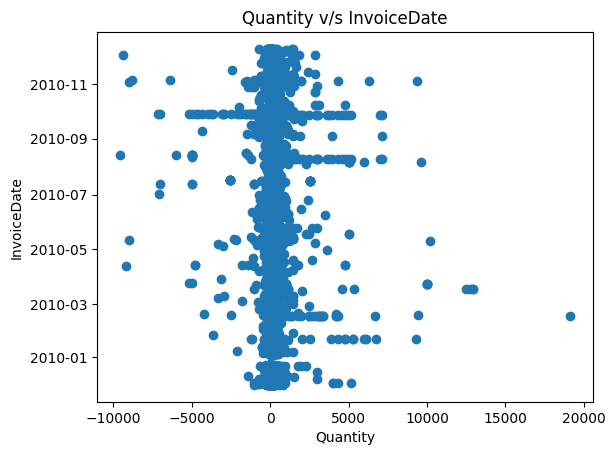

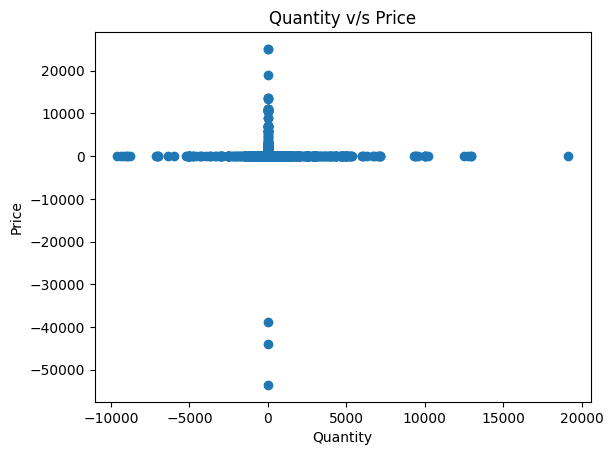

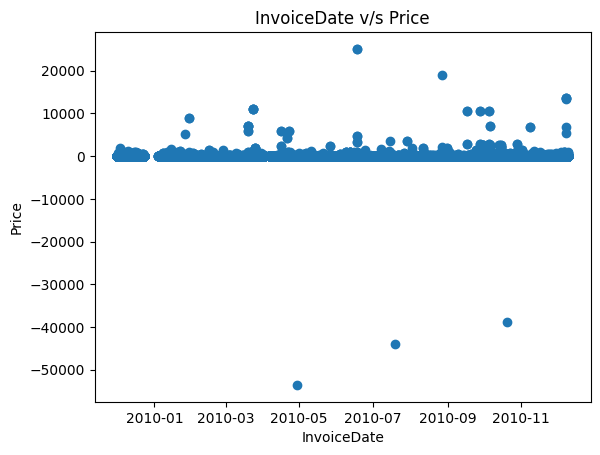

## Correlation:

## Missing Matrix:

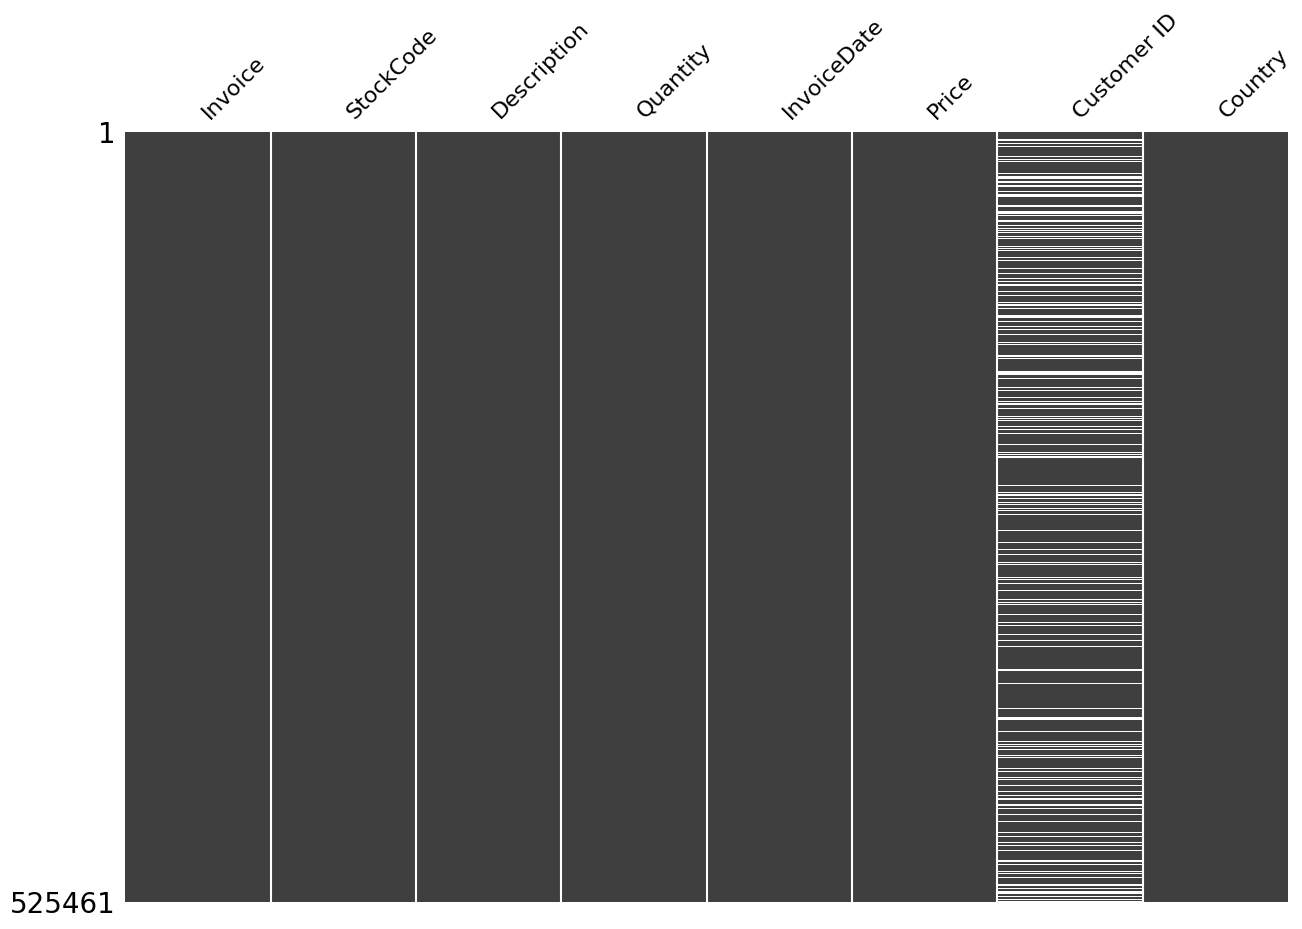

In [10]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Al analizar los resultados obtenidos de los analisis univariados y mutivariados, se observan distintos errores o problemas con los datos. Ejemplo de esto es que existen valores negativos para las cantidades vendidas y los precios de esta, razon por la cual, se procede a filtrar el dataframe para filtrar los valores irregulares. Dentro de lo mismo, el analisis mostraba como la precencia de outliers arruinaba la correcta interpretacion de los datos. Para solucionar lo anterior se decidio realizar una eliminacion de outliers utilizando el metodo del rango intercuartil (IQR), lo anterior para las columnas de Precio y Cantidad. Finalmente se eliminaron los datos duplicados. Se observo tambien que solo existian valores nulos en la columna CustomerID, sin embargo, estos correspondian a aproximadamente el 20% de los datos de la columna, razon por la cual se decidio no eliminar estos datos, pues en este caso es de mayor utilidad conservar esta informacion y no utilizar el CustomerID.

In [11]:
def clean(df):
  data = df.copy()

  # Se eliminan cantidades negativas en Precio y Cantidad
  data = data[(data.Quantity >= 0) & (data.Price >= 0)]

  # Se eliminan los outliers en ambas columnas utilizando el metodo IQR
  Q1_price = data.Price.quantile(0.25)
  Q3_price = data.Price.quantile(0.75)
  IQR_price = Q3_price - Q1_price
  data = data[(data.Price >= Q1_price - 1.5 * IQR_price) & (data.Price <= Q3_price + 1.5 * IQR_price)]

  Q1_qty = data.Quantity.quantile(0.25)
  Q3_qty = data.Quantity.quantile(0.75)
  IQR_qty = Q3_qty - Q1_qty
  data = data[(data.Quantity >= Q1_qty - 1.5 * IQR_qty) & (data.Quantity <= Q3_qty + 1.5 * IQR_qty)]

  data = data.drop_duplicates()
  data = data.reset_index(drop=True)
  return data

----------------------------------------------------------------------------------------------------


## Quantity Profile

Type                              int64
Number of observations         445663.0
Mean                           6.094908
Std                            6.340158
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                                28.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           1.754041
Skew                            1.54762
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   445663
Duplicate rows (%)              100.0 %
Total size in memory      3565432 bytes
dtype: object

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


## Price Profile

Type                            float64
Number of observations         445663.0
Mean                           2.751085
Std                            2.033877
Min                                 0.0
25%                                1.25
50%                                 2.1
75%                                3.75
Max                                8.62
Negative                              0
Negative (%)                      0.0 %
Zeros                              1175
Zeros (%)                        0.26 %
Kurt                           0.630573
Skew                           1.160786
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   445613
Duplicate rows (%)              99.99 %
Total size in memory      3565432 bytes
dtype: object

----------------------------------------------------------------------------------------------------


## Bivariant Analysis:

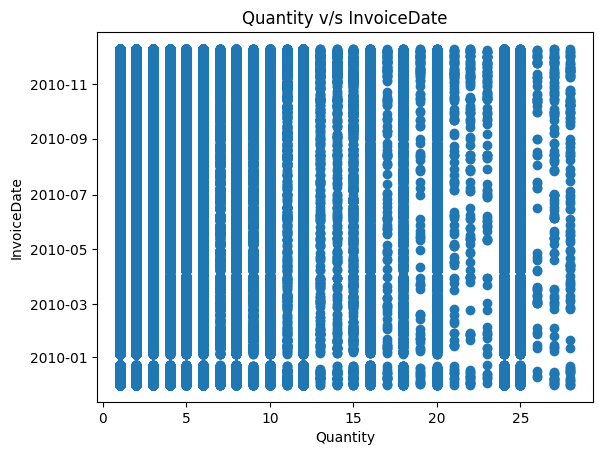

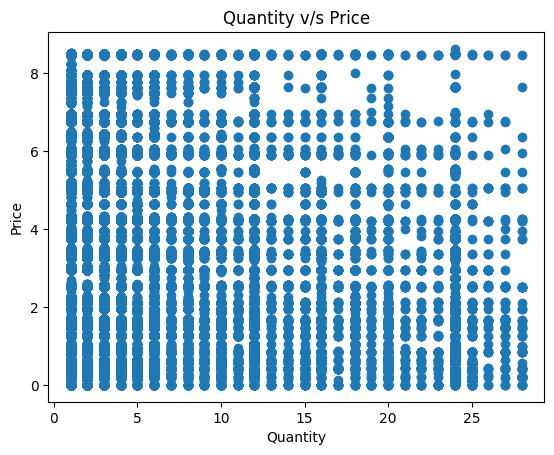

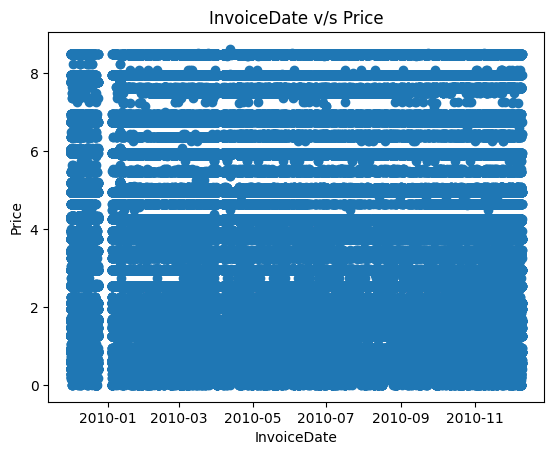

## Correlation:

## Missing Matrix:

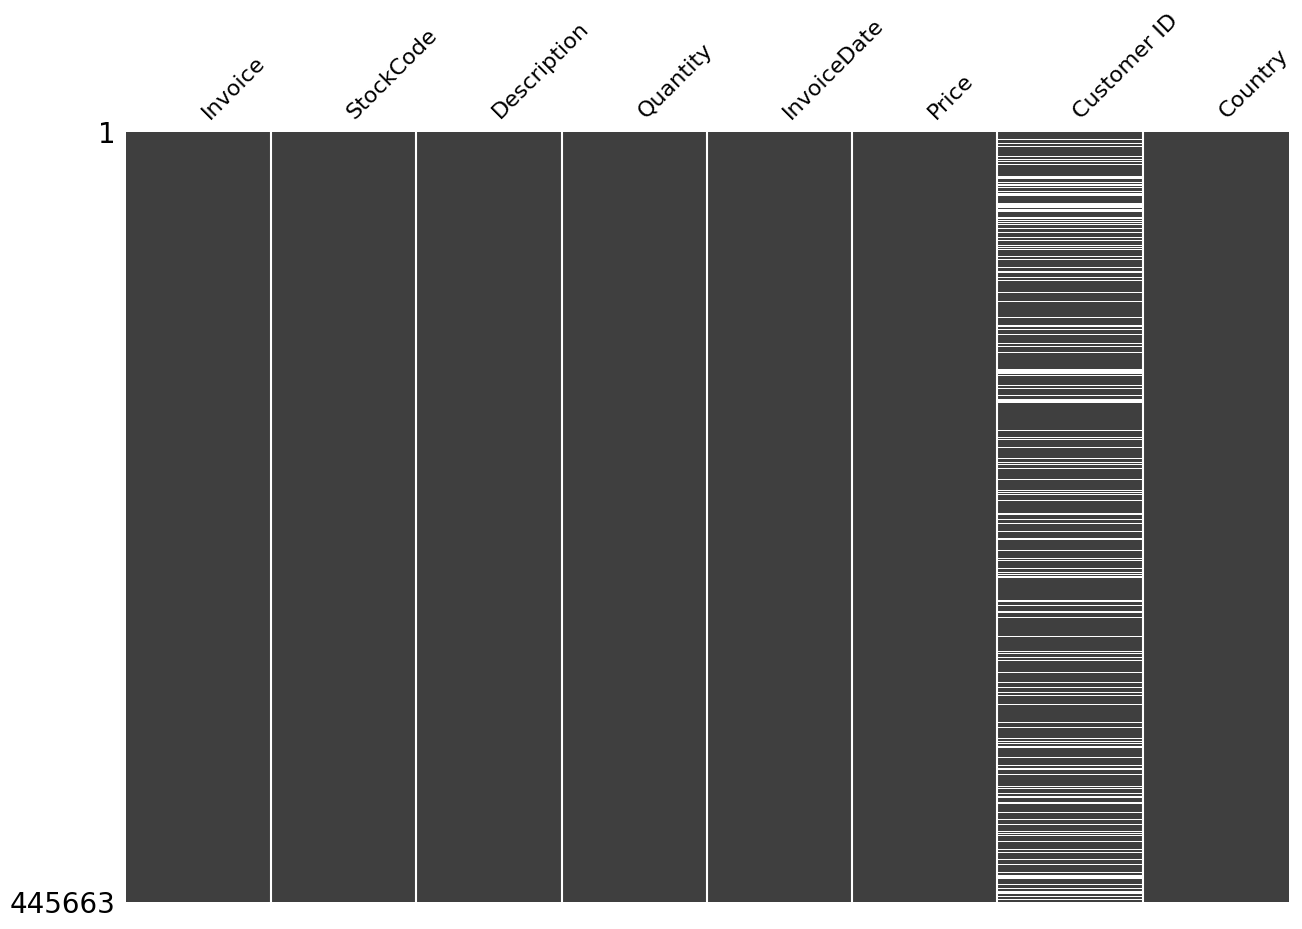

In [12]:
df_retail = clean(df_retail)
for col in df_retail.columns:
  if is_numeric_dtype(df_retail[col]):
        print(100*'-')
        profile_serie(df_retail[col])
        print(100*'-')
profile_df(df_retail)

Se observa que luego de realizar la limpieza de los datos, ya no se observan patrones irregulares o ruidosos causados por la presencia de outliers, y las distribuciones de las variables se pueden apreciar de mejor manera. Teniendo en cuenta esto, se puede concluir que la limpieza realizada resulto beneficiosa al momento de realizar el analisis exploratorio.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [13]:

# Calculamos los ingresos por producto
df_retail['Ingresos'] = df_retail['Quantity'] * df_retail['Price']

# Top 30 productos con más ingresos y cantidades
top_products = df_retail.groupby('Description').agg({'Ingresos': 'sum', 'Quantity': 'sum'}).nlargest(30, 'Ingresos').reset_index()

# Gráfico de barras con doble barra
fig = go.Figure()
fig.add_trace(go.Bar(x=top_products['Description'], y=top_products['Ingresos'], name='Ingresos'))
fig.add_trace(go.Bar(x=top_products['Description'], y=top_products['Quantity'], name='Cantidades'))

# Configuración del diseño del gráfico
fig.update_layout(title='Top 30 productos con mayores ingresos y cantidades',
                  xaxis_title='Productos',
                  yaxis=dict(title='Ingresos / Cantidades'),
                  barmode='group')

fig.show()

Al analizar los datos de los 30 productos que generan mayores ingresos vemos que, si bien el producto con mayor ingresos es el mismo que posee la mayor cantidad de ventas realizadas, este praton no se observa por ejemplo el segundo y tercer producto que mayores ingresos generan tienen menos de la mitad de productos vendidos que el cuarto producto con mejores ingresos. En general, hay productos que venden mas de doble que otros y generan menos de la mitad de ganancias. Teniendo en cuenta esto, podemos decir que a excepcion del primer puesto, el resto de productos con mayores ingresos no son necesariamente los que mayores cantidades vendidas tienen.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [14]:

def plot_ventas(dataframe):
    df = dataframe.copy()
    df["Date"] = pd.to_datetime(df["InvoiceDate"]).dt.date
    df["Quantity"] = pd.to_numeric(df["Quantity"])
    sub_df = df[["Date", "Quantity"]]
    ventas_por_fecha = sub_df.groupby("Date").sum()["Quantity"]

    fig = go.Figure(data=go.Scatter(x=ventas_por_fecha.index, y=ventas_por_fecha.values))
    fig.update_layout(
        title="Ventas en el tiempo",
        xaxis_title="Fecha",
        yaxis_title="Ventas",
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig.show()

In [15]:
plot_ventas(df_retail)

Se observa claramente que exista una alta varianza en el registro temporal de las ventas. Otro aspecto a tener en cuenta, es el patron en las ventas que se produce en las fechas cercanas a fin de año. El nivel de ventas aumenta considerablemente en estas fechas, y aunque puede parecer extraño en un principio, concuerda con la idea de que en estas fechas hay festividadades como Thanks Giving o Navidad, razon por la cual se entenderia el aumento considerable que se observa en las ventas de estos periodos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>